In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import appid

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

weather_df = pd.read_csv(output_data_file)
weather_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

In [3]:
#Create a Data Frame to Hold Output Data
weather_output_df = pd.DataFrame(columns=['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])
weather_output_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [4]:
#Perform API Calls

#Code from APIs Day 3 Activity 5, ShoutOut to Matt Johnson for Reminding Me to Remove the '==' and Start Filling an Empty DF
#Print Title
print('Beginning Data Retrieval')
print('--------------------------------')
#Iterate Through the Cities
for index, row in weather_df.iterrows():
    #Assign the Base URL
    base_url = 'http://api.openweathermap.org/data/2.5/weather'
    #Assign the Parameters
    params = {'q':cities[index], 'appid':appid, 'units':'imperial'}
    #Obtain the Response
    response = requests.get(base_url, params=params).json()
    #See if A Given City is in the List
    try:
        weather_output_df.loc[index, "City" ] = response['name']
        weather_output_df.loc[index, "Cloudiness"] = response['clouds']['all']
        weather_output_df.loc[index, "Country"] = response['sys']['country']
        weather_output_df.loc[index, "Date"] = response['dt']
        weather_output_df.loc[index, "Humidity"] = response['main']['humidity']
        weather_output_df.loc[index, "Lat"] = response['coord']['lat']
        weather_output_df.loc[index, "Lng"] = response['coord']['lon']
        weather_output_df.loc[index, "Max Temp"] = response['main']['temp_max']
        weather_output_df.loc[index, "Wind Speed"] = response['wind']['speed']
        print(f"Processing record {index} | {cities[index]}")
    except (KeyError, IndexError):
        print("City not Found. Skipping...")
        
print('---------------------------------')
print('Data Retrieval Complete')
print('---------------------------------')

Beginning Data Retrieval
--------------------------------
Processing record 0 | cabo san lucas
Processing record 1 | santa vitoria do palmar
Processing record 2 | mehamn
Processing record 3 | mar del plata
Processing record 4 | flin flon
Processing record 5 | douglas
Processing record 6 | chuy
Processing record 7 | yellowknife
Processing record 8 | kalmunai
Processing record 9 | talnakh
Processing record 10 | prabumulih
Processing record 11 | betare oya
Processing record 12 | port elizabeth
Processing record 13 | busselton
Processing record 14 | odweyne
Processing record 15 | santa rosalia
Processing record 16 | cervo
Processing record 17 | rikitea
Processing record 18 | zhigansk
Processing record 19 | nanortalik
Processing record 20 | ushuaia
Processing record 21 | qaanaaq
Processing record 22 | punta arenas
Processing record 23 | rio bananal
Processing record 24 | jamestown
Processing record 25 | bitung
Processing record 26 | la ronge
Processing record 27 | dakar
Processing record 28

Processing record 253 | mogadishu
Processing record 254 | great yarmouth
Processing record 255 | teplodar
Processing record 256 | avarua
Processing record 257 | mundo novo
Processing record 258 | kloulklubed
Processing record 259 | maldonado
Processing record 260 | padang
Processing record 261 | kamaishi
Processing record 262 | chapais
Processing record 263 | lichuan
Processing record 264 | piranshahr
Processing record 265 | khani
Processing record 266 | kieta
City not Found. Skipping...
Processing record 268 | atar
City not Found. Skipping...
Processing record 270 | asau
Processing record 271 | thanh hoa
Processing record 272 | moose factory
Processing record 273 | marica
Processing record 274 | dingle
Processing record 275 | pueblo nuevo
City not Found. Skipping...
Processing record 277 | marystown
City not Found. Skipping...
Processing record 279 | fare
Processing record 280 | laguna
City not Found. Skipping...
Processing record 282 | severodvinsk
City not Found. Skipping...
Process

Processing record 502 | college
City not Found. Skipping...
Processing record 504 | leningradskiy
Processing record 505 | broken hill
City not Found. Skipping...
Processing record 507 | sept-iles
Processing record 508 | olawa
City not Found. Skipping...
Processing record 510 | dillon
Processing record 511 | qui nhon
Processing record 512 | xinan
Processing record 513 | masyaf
Processing record 514 | tocopilla
Processing record 515 | sur
Processing record 516 | morant bay
Processing record 517 | portobelo
Processing record 518 | pemangkat
Processing record 519 | mantua
Processing record 520 | camacha
Processing record 521 | pitimbu
Processing record 522 | zhireken
Processing record 523 | pangnirtung
Processing record 524 | whitehorse
Processing record 525 | aswan
Processing record 526 | yar-sale
Processing record 527 | realeza
Processing record 528 | sexsmith
Processing record 529 | haines junction
Processing record 530 | tibiri
Processing record 531 | karsun
Processing record 532 | gri

In [5]:
#Find the Types of Values for a Query
base_url = 'http://api.openweathermap.org/data/2.5/weather'
params = {'q':'souillac', 'units':'metric', 'appid':appid}
response = requests.get(base_url, params=params).json()
response

{'coord': {'lon': 57.52, 'lat': -20.52},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 25.79,
  'feels_like': 31.71,
  'temp_min': 25.56,
  'temp_max': 26,
  'pressure': 1008,
  'humidity': 94},
 'visibility': 10000,
 'wind': {'speed': 0.5, 'deg': 80},
 'clouds': {'all': 90},
 'dt': 1583125535,
 'sys': {'type': 1,
  'id': 2061,
  'country': 'MU',
  'sunrise': 1583114877,
  'sunset': 1583159787},
 'timezone': 14400,
 'id': 933995,
 'name': 'Souillac',
 'cod': 200}

In [6]:
#Return the City Count with Data
weather_output_df = weather_output_df.reset_index(drop=True)
weather_output_df.count()
weather_output_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cabo San Lucas,5,MX,1583125502,43,22.89,-109.91,71.6,8.05
1,Santa Vitória do Palmar,4,BR,1583125681,89,-33.52,-53.37,67.39,9.13
2,Mehamn,97,NO,1583125384,78,71.04,27.85,24.8,9.17
3,Mar del Plata,0,AR,1583125447,88,-38,-57.56,72,13.87
4,Flin Flon,69,CA,1583125681,95,54.77,-101.86,-1.08,5.37
...,...,...,...,...,...,...,...,...,...
498,Toamasina,40,MG,1583125734,83,-18.17,49.38,77,10.29
499,Tres Arroyos,1,AR,1583125734,29,-38.37,-60.28,75.45,12.39
500,Gorontalo,98,ID,1583125520,92,0.54,123.06,78.12,5.1
501,Port Blair,14,IN,1583125490,69,11.67,92.75,81.18,9.04


In [7]:
#Export to a CSV File
weather_output_df.to_csv("Weather_Output.csv")
weather_output_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cabo San Lucas,5,MX,1583125502,43,22.89,-109.91,71.6,8.05
1,Santa Vitória do Palmar,4,BR,1583125681,89,-33.52,-53.37,67.39,9.13
2,Mehamn,97,NO,1583125384,78,71.04,27.85,24.8,9.17
3,Mar del Plata,0,AR,1583125447,88,-38,-57.56,72,13.87
4,Flin Flon,69,CA,1583125681,95,54.77,-101.86,-1.08,5.37


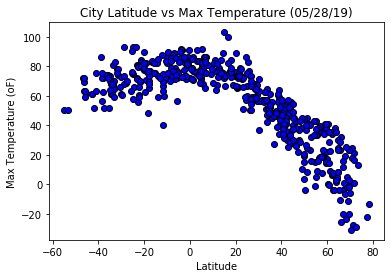

This Scatter Plot is determining the relationship between the max temperature in a city and its latitude.
The data shows that the temperature increases in proximity to the equator.


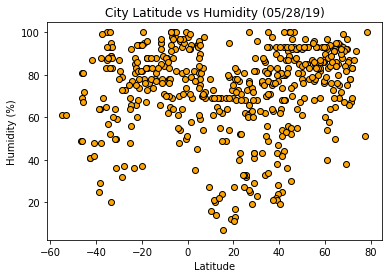

This Scatter Plot is determining the relationship between the humidity in a city and its latitude.
There does not appear to be a correlation between the humidity and latitude of a city.


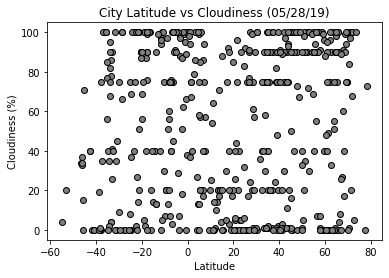

This Scatter Plot is determining the relationship between the cloudiness in a city and its latitude.
There does not appear to be a correlation between the cloudiness and latitude of a city.


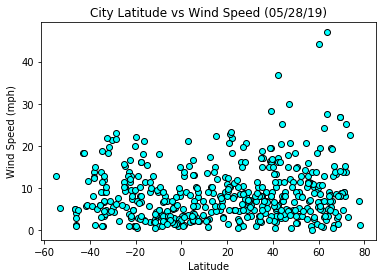

This Scatter Plot is determining the relationship between the wind speed in a city and its latitude.
There does not appear to be a correlation between the wind speed and latitude of a city.


In [8]:
#Create Scatter Plots

#Temperature(oF) vs Latitude
temp_plot = plt.scatter(weather_output_df['Lat'], weather_output_df['Max Temp'], c="blue", edgecolors="black")
plt.title("City Latitude vs Max Temperature (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (oF)")
#Export/Save the Plot to a PNG File
#Method Found on https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it-using-matplotlib
plt.savefig("Temperature vs Latitude.png", bbox_inches='tight')
plt.show()

print("This Scatter Plot is determining the relationship between the max temperature in a city and its latitude.")
print("The data shows that the temperature increases in proximity to the equator.")

#Humidity% vs Latitude
humid_plot = plt.scatter(weather_output_df['Lat'], weather_output_df['Humidity'], c="orange", edgecolors="black")
plt.title("City Latitude vs Humidity (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#Export/Save the Plot to a PNG File
plt.savefig("Humidity vs Latitude.png", bbox_inches='tight')
plt.show()

print("This Scatter Plot is determining the relationship between the humidity in a city and its latitude.")
print("There does not appear to be a correlation between the humidity and latitude of a city.")

#Cloudiness vs Latitude
cloud_plot = plt.scatter(weather_output_df['Lat'], weather_output_df['Cloudiness'], c="gray", edgecolors="black")
plt.title("City Latitude vs Cloudiness (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
#Export/Save the Plot to a PNG File
plt.savefig("Cloudiness vs Latitude.png", bbox_inches='tight')
plt.show()

print("This Scatter Plot is determining the relationship between the cloudiness in a city and its latitude.")
print("There does not appear to be a correlation between the cloudiness and latitude of a city.")

#Wind Speed vs Latitude
wind_plot = plt.scatter(weather_output_df['Lat'], weather_output_df['Wind Speed'], c="cyan", edgecolors="black")
plt.title("City Latitude vs Wind Speed (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#Export/Save the Plot to a PNG File
plt.savefig("Wind Speed vs Latitude.png", bbox_inches='tight')
plt.show()

print("This Scatter Plot is determining the relationship between the wind speed in a city and its latitude.")
print("There does not appear to be a correlation between the wind speed and latitude of a city.")

In [9]:
#Create DataFrames for Northern & Southern Hemispheres
north_df = weather_output_df.loc[weather_output_df['Lat']>=0]
north_df = north_df.reset_index(drop=True)

south_df = weather_output_df.loc[weather_output_df['Lat']<0]
south_df = south_df.reset_index(drop=True)

#Print the Northern Hemisphere DataFrame
north_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cabo San Lucas,5,MX,1583125502,43,22.89,-109.91,71.6,8.05
1,Mehamn,97,NO,1583125384,78,71.04,27.85,24.8,9.17
2,Flin Flon,69,CA,1583125681,95,54.77,-101.86,-1.08,5.37
3,Douglas,1,US,1583125681,74,41.3,-96.17,39.2,10.29
4,Yellowknife,90,CA,1583125461,76,62.46,-114.35,-4,12.75
...,...,...,...,...,...,...,...,...,...
329,Şarkîkaraağaç,24,TR,1583125733,76,38.08,31.37,38.62,2.37
330,Voskresensk,90,RU,1583125733,86,55.31,38.66,37.4,11.18
331,Gorontalo,98,ID,1583125520,92,0.54,123.06,78.12,5.1
332,Port Blair,14,IN,1583125490,69,11.67,92.75,81.18,9.04


In [10]:
#Print the Southern Hemisphere DataFrame
south_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Santa Vitória do Palmar,4,BR,1583125681,89,-33.52,-53.37,67.39,9.13
1,Mar del Plata,0,AR,1583125447,88,-38,-57.56,72,13.87
2,Chui,4,UY,1583125521,89,-33.7,-53.46,67.39,9.13
3,Prabumulih,88,ID,1583125682,54,-3.45,104.25,91.13,5.59
4,Port Elizabeth,95,ZA,1583125208,93,-33.92,25.57,64.4,3.36
...,...,...,...,...,...,...,...,...,...
164,Realeza,0,BR,1583125732,75,-25.77,-53.53,63.09,5.95
165,Jacareacanga,100,BR,1583125733,97,-6.22,-57.75,73.9,1.39
166,Poum,87,NC,1583125513,82,-20.23,164.02,81.84,20.09
167,Toamasina,40,MG,1583125734,83,-18.17,49.38,77,10.29


The R-Squared value is: 0.8125324681320799


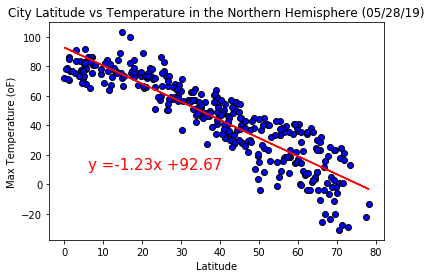

This Scatter Plot is determining the relationship between the max temperature in a city and its latitude.
The distribution of the data points and the R-Squared value both suggest that there is a strong negative correlation between the max temperature and latitude in the Northern Hemisphere.
---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
The R-Squared value is: 0.24186607292630755


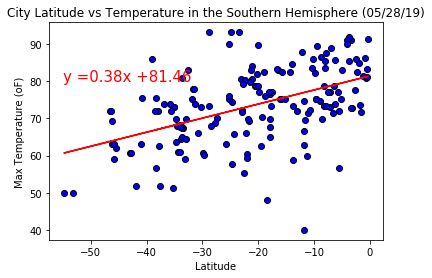

This Scatter Plot is determining the relationship between the max temperature in a city and its latitude.
The distribution of the data points and the R-Squared value both suggest that there is a very weak or non-existent positive correlation between the max temperature and latitude in the Southern Hemisphere.
There were fewer data points, with data not going as far south, so this conclusion may be weaker.


In [11]:
#Run Linear Regression Analysis for Temperature vs Latitude

#Northern Hemisphere
#Create Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'].astype(float), north_df['Max Temp'].astype(float))
#Create the Regression Equation
regress_values = slope * north_df['Lat'] + intercept
#Create the Equation Displayed on the Plot
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
#Create the Scatter Plot
north_temp_plot = plt.scatter(north_df['Lat'], north_df['Max Temp'], color="blue", edgecolors="black")
#Plot the Regress Values
plt.plot(north_df['Lat'], regress_values, "r-")
#Annotate/Append the Line Equation to the Plot
plt.annotate(line_eq, (6, 10), fontsize = 15, color = "red")
#Create the Labels
plt.title("City Latitude vs Temperature in the Northern Hemisphere (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (oF)")
#Export the Results to a PNG File
plt.savefig("Northern Temperature vs Latitude")
#Print the R-Squared Value
print(f"The R-Squared value is: {rvalue**2}")
#Show the Plot
plt.show()
#Print the Conclusions
print("This Scatter Plot is determining the relationship between the max temperature in a city and its latitude.")
print("The distribution of the data points and the R-Squared value both suggest that there is a strong negative correlation between the max temperature and latitude in the Northern Hemisphere.")
print("---------------------------------------------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------------------------------------------")
#Southern Hemisphere
#Create Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'].astype(float), south_df['Max Temp'].astype(float))
#Create the Regression Equation
regress_values = slope * south_df['Lat'] + intercept
#Create the Equation Displayed on the Plot
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
#Create the Scatter Plot
south_temp_plot = plt.scatter(south_df['Lat'], south_df['Max Temp'], color="blue", edgecolors="black")
#Plot the Regress Values
plt.plot(south_df['Lat'], regress_values, "r-")
#Annotate/Append the Line Equation to the Plot
plt.annotate(line_eq, (-55, 80), fontsize = 15, color = "red")
#Create the Labels
plt.title("City Latitude vs Temperature in the Southern Hemisphere (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (oF)")
#Export the Results to a PNG File
plt.savefig("Southern Temperature vs Latitude")
#Print the R-Squared Value
print(f"The R-Squared value is: {rvalue**2}")
#Show the Plot
plt.show()
#Print the Conclusions
print("This Scatter Plot is determining the relationship between the max temperature in a city and its latitude.")
print("The distribution of the data points and the R-Squared value both suggest that there is a very weak or non-existent positive correlation between the max temperature and latitude in the Southern Hemisphere.")
print("There were fewer data points, with data not going as far south, so this conclusion may be weaker.")

The R-Squared value is: 0.09197175278400511


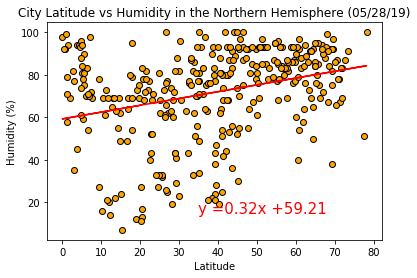

This Scatter Plot is determining the relationship between the humidity in a city and its latitude.
The distribution of the data points and the R-Squared value both suggest that there is a very weak or non-existant positive correlation between the humidity and latitude in the Northern Hemisphere.
---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
The R-Squared value is: 0.09714333141287125


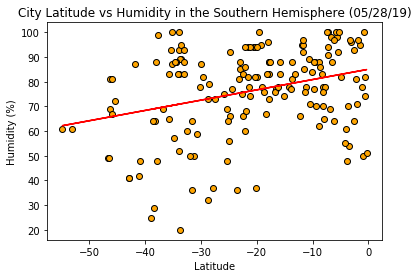

This Scatter Plot is determining the relationship between the humidity in a city and its latitude.
The distribution of the data points and the R-Squared value both suggest that there is a very weak or non-existent positive correlation between the humidity and latitude in the Southern Hemisphere.
There were fewer data points, with data not going as far south, so this conclusion may be weaker.


In [12]:
#Run Linear Regression Analysis for Humidity vs Latitude

#Northern Hemisphere
#Create Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'].astype(float), north_df['Humidity'].astype(float))
#Create the Regression Equation
regress_values = slope * north_df['Lat'] + intercept
#Create the Equation Displayed on the Plot
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
#Create the Scatter Plot
north_humid_plot = plt.scatter(north_df['Lat'], north_df['Humidity'], color="orange", edgecolors="black")
#Plot the Regress Values
plt.plot(north_df['Lat'], regress_values, "r-")
#Annotate/Append the Line Equation to the Plot
plt.annotate(line_eq, (35, 15), fontsize = 15, color = "red")
#Create the Labels
plt.title("City Latitude vs Humidity in the Northern Hemisphere (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#Export the Results to a PNG File
plt.savefig("Northern Humidity vs Latitude")
#Print the R-Squared Value
print(f"The R-Squared value is: {rvalue**2}")
#Show the Plot
plt.show()
#Print the Conclusions
print("This Scatter Plot is determining the relationship between the humidity in a city and its latitude.")
print("The distribution of the data points and the R-Squared value both suggest that there is a very weak or non-existant positive correlation between the humidity and latitude in the Northern Hemisphere.")
print("---------------------------------------------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------------------------------------------")
#Southern Hemisphere
#Create Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'].astype(float), south_df['Humidity'].astype(float))
#Create the Regression Equation
regress_values = slope * south_df['Lat'] + intercept
#Create the Equation Displayed on the Plot
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
#Create the Scatter Plot
south_temp_plot = plt.scatter(south_df['Lat'], south_df['Humidity'], color="orange", edgecolors="black")
#Plot the Regress Values
plt.plot(south_df['Lat'], regress_values, "r-")
#Annotate/Append the Line Equation to the Plot
plt.annotate(line_eq, (-30, 15), fontsize = 15, color = "red")
#Create the Labels
plt.title("City Latitude vs Humidity in the Southern Hemisphere (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#Export the Results to a PNG File
plt.savefig("Southern Humidity vs Latitude")
#Print the R-Squared Value
print(f"The R-Squared value is: {rvalue**2}")
#Show the Plot
plt.show()
#Print the Conclusions
print("This Scatter Plot is determining the relationship between the humidity in a city and its latitude.")
print("The distribution of the data points and the R-Squared value both suggest that there is a very weak or non-existent positive correlation between the humidity and latitude in the Southern Hemisphere.")
print("There were fewer data points, with data not going as far south, so this conclusion may be weaker.")

The R-Squared value is: 0.025313363407054805


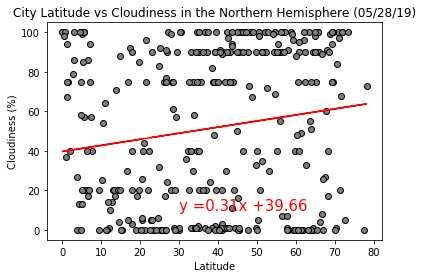

This Scatter Plot is determining the relationship between the cloudiness in a city and its latitude.
The distribution of the data points and the R-Squared value both suggest that there is no correlation between the cloudiness and latitude in the Northern Hemisphere.
---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
The R-Squared value is: 0.06859964539065808


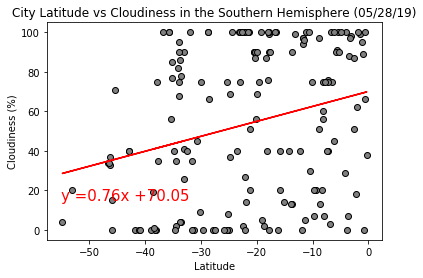

This Scatter Plot is determining the relationship between the cloudiness in a city and its latitude.
The distribution of the data points and the R-Squared value both suggest that there is no correlation between the cloudiness and latitude in the Southern Hemisphere.
There were fewer data points, with data not going as far south, so this conclusion may be weaker.


In [16]:
#Run Linear Regression Analysis for Cloudiness vs Latitude

#Northern Hemisphere
#Create Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'].astype(float), north_df['Cloudiness'].astype(float))
#Create the Regression Equation
regress_values = slope * north_df['Lat'] + intercept
#Create the Equation Displayed on the Plot
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
#Create the Scatter Plot
north_cloud_plot = plt.scatter(north_df['Lat'], north_df['Cloudiness'], color="gray", edgecolors="black")
#Plot the Regress Values
plt.plot(north_df['Lat'], regress_values, "r-")
#Annotate/Append the Line Equation to the Plot
plt.annotate(line_eq, (30, 10), fontsize = 15, color = "red")
#Create the Labels
plt.title("City Latitude vs Cloudiness in the Northern Hemisphere (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
#Export the Results to a PNG File
plt.savefig("Northern Cloudiness vs Latitude")
#Print the R-Squared Value
print(f"The R-Squared value is: {rvalue**2}")
#Show the Plot
plt.show()
#Print the Conclusions
print("This Scatter Plot is determining the relationship between the cloudiness in a city and its latitude.")
print("The distribution of the data points and the R-Squared value both suggest that there is no correlation between the cloudiness and latitude in the Northern Hemisphere.")
print("---------------------------------------------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------------------------------------------")
#Southern Hemisphere
#Create Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'].astype(float), south_df['Cloudiness'].astype(float))
#Create the Regression Equation
regress_values = slope * south_df['Lat'] + intercept
#Create the Equation Displayed on the Plot
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
#Create the Scatter Plot
south_temp_plot = plt.scatter(south_df['Lat'], south_df['Cloudiness'], color="gray", edgecolors="black")
#Plot the Regress Values
plt.plot(south_df['Lat'], regress_values, "r-")
#Annotate/Append the Line Equation to the Plot
plt.annotate(line_eq, (-55, 15), fontsize = 15, color = "red")
#Create the Labels
plt.title("City Latitude vs Cloudiness in the Southern Hemisphere (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
#Export the Results to a PNG File
plt.savefig("Southern Cloudiness vs Latitude")
#Print the R-Squared Value
print(f"The R-Squared value is: {rvalue**2}")
#Show the Plot
plt.show()
#Print the Conclusions
print("This Scatter Plot is determining the relationship between the cloudiness in a city and its latitude.")
print("The distribution of the data points and the R-Squared value both suggest that there is no correlation between the cloudiness and latitude in the Southern Hemisphere.")
print("There were fewer data points, with data not going as far south, so this conclusion may be weaker.")

The R-Squared value is: 0.019501250583504673


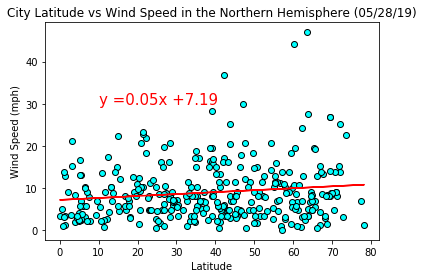

This Scatter Plot is determining the relationship between the wind speed in a city and its latitude.
The distribution of the data points and the R-Squared value both suggest that there is no correlation between the wind speed and latitude in the Northern Hemisphere.
---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
The R-Squared value is: 0.05267002027191577


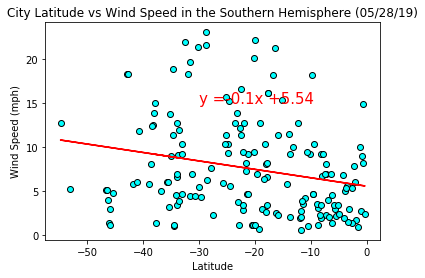

This Scatter Plot is determining the relationship between the wind speed in a city and its latitude.
The distribution of the data points and the R-Squared value both suggest that there is no correlation between the wind speed and latitude in the Southern Hemisphere.
There were fewer data points, with data not going as far south, so this conclusion may be weaker.


In [17]:
#Run Linear Regression Analysis for Cloudiness vs Latitude

#Northern Hemisphere
#Create Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'].astype(float), north_df['Wind Speed'].astype(float))
#Create the Regression Equation
regress_values = slope * north_df['Lat'] + intercept
#Create the Equation Displayed on the Plot
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
#Create the Scatter Plot
north_cloud_plot = plt.scatter(north_df['Lat'], north_df['Wind Speed'], color="cyan", edgecolors="black")
#Plot the Regress Values
plt.plot(north_df['Lat'], regress_values, "r-")
#Annotate/Append the Line Equation to the Plot
plt.annotate(line_eq, (10, 30), fontsize = 15, color = "red")
#Create the Labels
plt.title("City Latitude vs Wind Speed in the Northern Hemisphere (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#Export the Results to a PNG File
plt.savefig("Northern Wind Speed vs Latitude")
#Print the R-Squared Value
print(f"The R-Squared value is: {rvalue**2}")
#Show the Plot
plt.show()
#Print the Conclusions
print("This Scatter Plot is determining the relationship between the wind speed in a city and its latitude.")
print("The distribution of the data points and the R-Squared value both suggest that there is no correlation between the wind speed and latitude in the Northern Hemisphere.")
print("---------------------------------------------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------------------------------------------")
#Southern Hemisphere
#Create Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'].astype(float), south_df['Wind Speed'].astype(float))
#Create the Regression Equation
regress_values = slope * south_df['Lat'] + intercept
#Create the Equation Displayed on the Plot
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
#Create the Scatter Plot
south_temp_plot = plt.scatter(south_df['Lat'], south_df['Wind Speed'], color="cyan", edgecolors="black")
#Plot the Regress Values
plt.plot(south_df['Lat'], regress_values, "r-")
#Annotate/Append the Line Equation to the Plot
plt.annotate(line_eq, (-30, 15), fontsize = 15, color = "red")
#Create the Labels
plt.title("City Latitude vs Wind Speed in the Southern Hemisphere (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#Export the Results to a PNG File
plt.savefig("Southern Wind Speed vs Latitude")
#Print the R-Squared Value
print(f"The R-Squared value is: {rvalue**2}")
#Show the Plot
plt.show()
#Print the Conclusions
print("This Scatter Plot is determining the relationship between the wind speed in a city and its latitude.")
print("The distribution of the data points and the R-Squared value both suggest that there is no correlation between the wind speed and latitude in the Southern Hemisphere.")
print("There were fewer data points, with data not going as far south, so this conclusion may be weaker.")

In [15]:
#Conclusions
print("Conclusions")
print("-------------------------------------------------------------------------------------------------------------------")
print("1. The latitude is only a good predictor of temperature. It is not a good predictor of humidity, cloudiness, or wind speed.")
print("-------------------------------------------------------------------------------------------------------------------")
print("2. The wind speeds seem to pick up at the very highest latitude values in the Northern Hemisphere, suggesting that perhaps  arctic winds contribute to the wind speed.")
print("-------------------------------------------------------------------------------------------------------------------")
print("3. There are fewer data points, with data not collected as far south in the Southern Hemisphere as it is far north in the   Northern Hemisphere. As such, the conclusions for the Southern Hemisphere are not as strong as the conclusions for the      Northern Hemisphere.")

Conclusions
-------------------------------------------------------------------------------------------------------------------
1. The latitude is only a good predictor of temperature. It is not a good predictor of humidity, cloudiness, or wind speed.
-------------------------------------------------------------------------------------------------------------------
2. The wind speeds seem to pick up at the very highest latitude values in the Northern Hemisphere, suggesting that perhaps  arctic winds contribute to the wind speed.
-------------------------------------------------------------------------------------------------------------------
3. There are fewer data points, with data not collected as far south in the Southern Hemisphere as it is far north in the   Northern Hemisphere. As such, the conclusions for the Southern Hemisphere are not as strong as the conclusions for the      Northern Hemisphere.
